In [1]:
# 서울시 범죄현황 통계자료 분석 및 시각화
# TODO
# 1. 데이터 입력 및 데이터 전처리 **중요!!
# - Excel 데이터 입력
# - 경찰서를 구별로 정리
# - 범죄별로 검거율 계산
# - 인구 데이터 merge

# 2. 데이터 탐색 (Data exploration)
# - 검거율 기준으로 데이터 정렬하기
# - 범죄별 발생 건수 정규화하기
# - 한글 데이터 시각화를 위한 준비
# - 구별 살인/절도 발생 건수 순위 살펴보기
# - 인구수로 나눠서 인구대비 발생비율로 살펴보기
# - [인구 수 대비] 구별 살인 발생 순위 살펴보기
# - [인구 수 대비] 구별 5대범죄 발생 수치 평균 계산하기
# - [인구 수 대비 5대범죄 발생 수치 평균] 구별 순위 비교하기

# 3. 데이터 시각화 (Data visualization)
# - 구별 살인사건 발생 건수 지도화
# - [인구 수 대비 5대범죄 발생 수치 평균] 구별 데이터 시각화
# - 구별 검거율 데이터 지도 시각화
# * 지도 시각화 : Folium library 활용
# * 지도 데이터 : GeoJSON 데이터 활용

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from matplotlib import font_manager, rc # rc == run configure(configuration file)

In [3]:
df = pd.read_excel("Report.xls")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   기간        27 non-null     object
 1   자치구       27 non-null     object
 2   합계        27 non-null     object
 3   합계.1      27 non-null     object
 4   살인        27 non-null     object
 5   살인.1      27 non-null     object
 6   강도        27 non-null     object
 7   강도.1      27 non-null     object
 8   강간강제추행    27 non-null     object
 9   강간강제추행.1  27 non-null     object
 10  절도        27 non-null     object
 11  절도.1      27 non-null     object
 12  폭력        27 non-null     object
 13  폭력.1      27 non-null     object
dtypes: object(14)
memory usage: 3.1+ KB


In [5]:
df

,기간,자치구,합계,합계.1,살인,살인.1,강도,강도.1,강간강제추행,강간강제추행.1,절도,절도.1,폭력,폭력.1
0,기간,자치구,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
1,2020,합계,92679,66548,141,126,138,132,5763,5458,38293,19705,48344,41127
2,2020,종로구,3102,3343,9,7,7,9,192,855,1183,944,1711,1528
3,2020,중구,3411,2323,2,2,5,6,186,128,1642,863,1576,1324
4,2020,용산구,2969,2056,5,3,6,6,230,186,1111,534,1617,1327
5,2020,성동구,2362,1774,5,5,3,3,115,98,1016,565,1223,1103
6,2020,광진구,3601,2511,2,2,4,4,255,224,1664,874,1676,1407
7,2020,동대문구,3401,2465,10,8,6,5,161,142,1440,713,1784,1597
8,2020,중랑구,3726,2781,10,9,5,6,183,153,1506,889,2022,1724
9,2020,성북구,2567,1947,4,4,3,2,142,121,988,580,1430,1240


In [6]:
gu_df = df.pivot_table(df, index='자치구',aggfunc=np.sum) #합계 함수
gu_df

,강간강제추행,강간강제추행.1,강도,강도.1,기간,살인,살인.1,절도,절도.1,폭력,폭력.1,합계,합계.1
자치구,,,,,,,,,,,,,
강남구,708,627,14,11,2020,6,5,2951,1491,3677,3111,7356,5245
강동구,188,167,15,14,2020,3,3,1640,781,1942,1697,3788,2662
강북구,159,132,5,4,2020,9,8,780,490,1817,1625,2770,2259
강서구,265,222,6,5,2020,10,9,1689,1070,2445,2087,4415,3393
관악구,403,351,3,3,2020,12,12,2229,1137,2614,2355,5261,3858
광진구,255,224,4,4,2020,2,2,1664,874,1676,1407,3601,2511
구로구,197,142,5,5,2020,6,6,1763,1008,2204,1823,4175,2984
금천구,117,93,7,6,2020,4,4,999,553,1471,1310,2598,1966
노원구,169,148,3,3,2020,4,3,1404,646,2163,1781,3743,2581


In [7]:
gu_df = gu_df.drop(['합계'])
gu_df

,강간강제추행,강간강제추행.1,강도,강도.1,기간,살인,살인.1,절도,절도.1,폭력,폭력.1,합계,합계.1
자치구,,,,,,,,,,,,,
강남구,708,627,14,11,2020,6,5,2951,1491,3677,3111,7356,5245
강동구,188,167,15,14,2020,3,3,1640,781,1942,1697,3788,2662
강북구,159,132,5,4,2020,9,8,780,490,1817,1625,2770,2259
강서구,265,222,6,5,2020,10,9,1689,1070,2445,2087,4415,3393
관악구,403,351,3,3,2020,12,12,2229,1137,2614,2355,5261,3858
광진구,255,224,4,4,2020,2,2,1664,874,1676,1407,3601,2511
구로구,197,142,5,5,2020,6,6,1763,1008,2204,1823,4175,2984
금천구,117,93,7,6,2020,4,4,999,553,1471,1310,2598,1966
노원구,169,148,3,3,2020,4,3,1404,646,2163,1781,3743,2581


In [8]:
gu_df = gu_df.drop(['자치구'])

In [9]:
len(gu_df)

25

In [10]:
gu_df.head(5)

,강간강제추행,강간강제추행.1,강도,강도.1,기간,살인,살인.1,절도,절도.1,폭력,폭력.1,합계,합계.1
자치구,,,,,,,,,,,,,
강남구,708,627,14,11,2020,6,5,2951,1491,3677,3111,7356,5245
강동구,188,167,15,14,2020,3,3,1640,781,1942,1697,3788,2662
강북구,159,132,5,4,2020,9,8,780,490,1817,1625,2770,2259
강서구,265,222,6,5,2020,10,9,1689,1070,2445,2087,4415,3393
관악구,403,351,3,3,2020,12,12,2229,1137,2614,2355,5261,3858


In [11]:
gu_df = gu_df.rename(columns={'강간강제추행':'강간(발생)'})

In [12]:
gu_df = gu_df.rename(columns={'강간강제추행.1':'강간(검거)'})
gu_df = gu_df.rename(columns={'강도.1':'강도(검거)'})
gu_df = gu_df.rename(columns={'강도':'강도(발생)'})
gu_df = gu_df.rename(columns={'살인':'살인(발생)'})
gu_df = gu_df.rename(columns={'살인.1':'살인(검거)'})
gu_df = gu_df.rename(columns={'합계':'소계(검거)'})
gu_df = gu_df.rename(columns={'합계.1':'소계(발생)'})
gu_df = gu_df.rename(columns={'절도':'절도(발생)'})
gu_df = gu_df.rename(columns={'절도.1':'절도(검거)'})
gu_df = gu_df.rename(columns={'폭력':'폭력(발생)'})
gu_df = gu_df.rename(columns={'폭력.1':'폭력(검거)'})

In [13]:
gu_df = gu_df.drop(['기간'], axis=1)

In [14]:
gu_df.head(5)

,강간(발생),강간(검거),강도(발생),강도(검거),살인(발생),살인(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),소계(검거),소계(발생)
자치구,,,,,,,,,,,,
강남구,708,627,14,11,6,5,2951,1491,3677,3111,7356,5245
강동구,188,167,15,14,3,3,1640,781,1942,1697,3788,2662
강북구,159,132,5,4,9,8,780,490,1817,1625,2770,2259
강서구,265,222,6,5,10,9,1689,1070,2445,2087,4415,3393
관악구,403,351,3,3,12,12,2229,1137,2614,2355,5261,3858


In [15]:
#범죄별로 검거율 계산하기
# 발생건수 대비 검거건수 -> 검거율 데이터 column을 범죄별로 생성
gu_df['강간검거율'] = gu_df['강간(검거)'] / gu_df['강간(발생)'] * 100
gu_df['강도검거율'] = gu_df['강도(검거)'] / gu_df['강도(발생)'] * 100
#gu_df['살인검거율'] = gu_df['살인(검거)'] / gu_df['살인(발생)'] * 100
gu_df['절도검거율'] = gu_df['절도(검거)'] / gu_df['절도(발생)'] * 100
gu_df['폭력검거율'] = gu_df['폭력(검거)'] / gu_df['폭력(발생)'] * 100
gu_df['검거율'] = gu_df['소계(발생)'] / gu_df['소계(검거)'] * 100
gu_df

,강간(발생),강간(검거),강도(발생),강도(검거),살인(발생),살인(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),소계(검거),소계(발생),강간검거율,강도검거율,절도검거율,폭력검거율,검거율
자치구,,,,,,,,,,,,,,,,,
강남구,708,627,14,11,6,5,2951,1491,3677,3111,7356,5245,88.5593,78.5714,50.5252,84.607,71.3023
강동구,188,167,15,14,3,3,1640,781,1942,1697,3788,2662,88.8298,93.3333,47.622,87.3841,70.2746
강북구,159,132,5,4,9,8,780,490,1817,1625,2770,2259,83.0189,80,62.8205,89.4331,81.5523
강서구,265,222,6,5,10,9,1689,1070,2445,2087,4415,3393,83.7736,83.3333,63.3511,85.3579,76.8516
관악구,403,351,3,3,12,12,2229,1137,2614,2355,5261,3858,87.0968,100,51.0094,90.0918,73.3321
광진구,255,224,4,4,2,2,1664,874,1676,1407,3601,2511,87.8431,100,52.524,83.9499,69.7306
구로구,197,142,5,5,6,6,1763,1008,2204,1823,4175,2984,72.0812,100,57.1753,82.7132,71.4731
금천구,117,93,7,6,4,4,999,553,1471,1310,2598,1966,79.4872,85.7143,55.3554,89.0551,75.6736
노원구,169,148,3,3,4,3,1404,646,2163,1781,3743,2581,87.574,100,46.0114,82.3393,68.9554


In [16]:
# 필요없는 column 지우기
del gu_df['강간(검거)']
del gu_df['강도(검거)']
del gu_df['살인(검거)']
del gu_df['절도(검거)']
del gu_df['폭력(검거)']
del gu_df['소계(검거)']
del gu_df['소계(발생)']
gu_df.head()

,강간(발생),강도(발생),살인(발생),절도(발생),폭력(발생),강간검거율,강도검거율,절도검거율,폭력검거율,검거율
자치구,,,,,,,,,,
강남구,708,14,6,2951,3677,88.5593,78.5714,50.5252,84.607,71.3023
강동구,188,15,3,1640,1942,88.8298,93.3333,47.622,87.3841,70.2746
강북구,159,5,9,780,1817,83.0189,80,62.8205,89.4331,81.5523
강서구,265,6,10,1689,2445,83.7736,83.3333,63.3511,85.3579,76.8516
관악구,403,3,12,2229,2614,87.0968,100,51.0094,90.0918,73.3321


In [17]:
# 검거율이 100이 넘을 값들을 바꾸어 주기
columns = ['강간검거율', '강도검거율', '절도검거율','폭력검거율']
gu_df_rate = gu_df[columns]

for row_index, row in gu_df_rate.iterrows():
    for column in columns:
        if row[column] > 100:
            gu_df.at[row_index, column] = 100
            
gu_df.head()

,강간(발생),강도(발생),살인(발생),절도(발생),폭력(발생),강간검거율,강도검거율,절도검거율,폭력검거율,검거율
자치구,,,,,,,,,,
강남구,708,14,6,2951,3677,88.5593,78.5714,50.5252,84.607,71.3023
강동구,188,15,3,1640,1942,88.8298,93.3333,47.622,87.3841,70.2746
강북구,159,5,9,780,1817,83.0189,80,62.8205,89.4331,81.5523
강서구,265,6,10,1689,2445,83.7736,83.3333,63.3511,85.3579,76.8516
관악구,403,3,12,2229,2614,87.0968,100,51.0094,90.0918,73.3321


In [18]:
# Masking 기법 (체 활용 기법)
# 위와 같이 복잡한 이중 for 문과 if 문을 쓸 필요 없이 바로 boolean 체크 후 값 대입 적용이 가능

gu_df[gu_df[['강간검거율', '강도검거율', '절도검거율', '폭력검거율']] > 100] = 100
gu_df.head(10)

,강간(발생),강도(발생),살인(발생),절도(발생),폭력(발생),강간검거율,강도검거율,절도검거율,폭력검거율,검거율
자치구,,,,,,,,,,
강남구,708,14,6,2951,3677,88.5593,78.5714,50.5252,84.607,71.3023
강동구,188,15,3,1640,1942,88.8298,93.3333,47.622,87.3841,70.2746
강북구,159,5,9,780,1817,83.0189,80,62.8205,89.4331,81.5523
강서구,265,6,10,1689,2445,83.7736,83.3333,63.3511,85.3579,76.8516
관악구,403,3,12,2229,2614,87.0968,100,51.0094,90.0918,73.3321
광진구,255,4,2,1664,1676,87.8431,100,52.524,83.9499,69.7306
구로구,197,5,6,1763,2204,72.0812,100,57.1753,82.7132,71.4731
금천구,117,7,4,999,1471,79.4872,85.7143,55.3554,89.0551,75.6736
노원구,169,3,4,1404,2163,87.574,100,46.0114,82.3393,68.9554


In [19]:
# 위 방범과 유사한 방식으로 Filtering 적용이 가능
# 강도 사건 발생 건수가 7건이 넘는 지역구를 추려내려면?

gu_df[gu_df['강도(발생)'] > 7]

,강간(발생),강도(발생),살인(발생),절도(발생),폭력(발생),강간검거율,강도검거율,절도검거율,폭력검거율,검거율
자치구,,,,,,,,,,
강남구,708,14,6,2951,3677,88.5593,78.5714,50.5252,84.607,71.3023
강동구,188,15,3,1640,1942,88.8298,93.3333,47.622,87.3841,70.2746
송파구,287,13,6,2429,2675,81.8815,100,41.4162,85.2336,65.5083


In [20]:
# 강도사건 발생 건구사 7건이 넘고 폭력사건 발생 건수가 2000건이 넘는 지역구는?

gu_df[(gu_df['강도(발생)'] > 7) & (gu_df['폭력(발생)'] > 2000)]

,강간(발생),강도(발생),살인(발생),절도(발생),폭력(발생),강간검거율,강도검거율,절도검거율,폭력검거율,검거율
자치구,,,,,,,,,,
강남구,708,14,6,2951,3677,88.5593,78.5714,50.5252,84.607,71.3023
송파구,287,13,6,2429,2675,81.8815,100,41.4162,85.2336,65.5083


In [21]:
# 강도사건 발생 건수가 7건이 넘거나 폭력사건 발생 건수가 2000건이 넘는 지역구

gu_df[(gu_df['강도(발생)'] > 7) | (gu_df['폭력(발생)'] > 2000)]

,강간(발생),강도(발생),살인(발생),절도(발생),폭력(발생),강간검거율,강도검거율,절도검거율,폭력검거율,검거율
자치구,,,,,,,,,,
강남구,708,14,6,2951,3677,88.5593,78.5714,50.5252,84.607,71.3023
강동구,188,15,3,1640,1942,88.8298,93.3333,47.622,87.3841,70.2746
강서구,265,6,10,1689,2445,83.7736,83.3333,63.3511,85.3579,76.8516
관악구,403,3,12,2229,2614,87.0968,100,51.0094,90.0918,73.3321
구로구,197,5,6,1763,2204,72.0812,100,57.1753,82.7132,71.4731
노원구,169,3,4,1404,2163,87.574,100,46.0114,82.3393,68.9554
서초구,396,6,5,2021,2173,76.5152,66.6667,47.5012,81.9144,66.3334
송파구,287,13,6,2429,2675,81.8815,100,41.4162,85.2336,65.5083
영등포구,315,6,7,2188,2701,80,83.3333,43.5558,79.8593,64.6157


In [22]:
# 강도사건 발생 건수가 5건을 넘지 않는 지역구는?
gu_df[~(gu_df['강도(발생)'] > 5)] # not의 비트 논리 연산자는 "~"

,강간(발생),강도(발생),살인(발생),절도(발생),폭력(발생),강간검거율,강도검거율,절도검거율,폭력검거율,검거율
자치구,,,,,,,,,,
강북구,159,5,9,780,1817,83.0189,80,62.8205,89.4331,81.5523
관악구,403,3,12,2229,2614,87.0968,100,51.0094,90.0918,73.3321
광진구,255,4,2,1664,1676,87.8431,100,52.524,83.9499,69.7306
구로구,197,5,6,1763,2204,72.0812,100,57.1753,82.7132,71.4731
노원구,169,3,4,1404,2163,87.574,100,46.0114,82.3393,68.9554
도봉구,82,2,-,861,1234,100,100,44.0186,82.8201,68.38
동작구,226,1,1,1341,1631,53.5398,100,44.1462,83.9975,65.1875
마포구,348,4,9,1483,1844,82.4713,75,45.7856,84.436,68.7093
서대문구,159,2,3,1077,1292,93.7107,50,48.6537,79.644,67.351


In [23]:
# 도봉구의 경우 살인 발생 & 검거 건수가 0이므로
# 검거율 계산 시 0으로 나누는 계산으로 인해 '살인검거율'의 값이 NaN, 결측치가 도니다.
# gu_df['살인검거율'] = gu_df['살인검거율'].fillna(100) #결측치의 값을 채워주다(fill)

In [24]:
gu_df[gu_df['강도(발생)'] == 2] # 강도사건 발생 건수가 n건인 지역구를 추려내려면?

,강간(발생),강도(발생),살인(발생),절도(발생),폭력(발생),강간검거율,강도검거율,절도검거율,폭력검거율,검거율
자치구,,,,,,,,,,
도봉구,82,2,-,861,1234,100,100,44.0186,82.8201,68.38
서대문구,159,2,3,1077,1292,93.7107,50,48.6537,79.644,67.351


In [25]:
# 새롭게 이름을 지어줄 때

gu_df.rename(columns = {'강간(발생)' : '강간',
                       '강도(발생)' : '강도',
                       '살인(발생)' : '살인',
                       '절도(발생)' : '절도',
                       '폭력(발생)' : '폭력'}, inplace = True) # implace 옵션 = 덮어쓰기 여부
gu_df.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,절도검거율,폭력검거율,검거율
자치구,,,,,,,,,,
강남구,708,14,6,2951,3677,88.5593,78.5714,50.5252,84.607,71.3023
강동구,188,15,3,1640,1942,88.8298,93.3333,47.622,87.3841,70.2746
강북구,159,5,9,780,1817,83.0189,80,62.8205,89.4331,81.5523
강서구,265,6,10,1689,2445,83.7736,83.3333,63.3511,85.3579,76.8516
관악구,403,3,12,2229,2614,87.0968,100,51.0094,90.0918,73.3321


In [26]:
# 인구 데이터 merge 하기
# 인구 데이터를 바깥에서 가져와서 합친다.

In [27]:
# 데이터 프레임 합치는 3가지 방법

# 1. A.join(B)
# 위아래로 섞여있어도 제자리로 잘 합쳐준다.
# A, B 데이터 프레임의 index column이 동일해야 함 (제약)

# 2. pd.merge(A, B, left_on = '구별', right_on = '구이름', how = 'inner')
# 위 아래로 섞여있어도 제자리로 잘 합쳐줌
# 기준이 되는 열이 서로 다른 이름을 가지고 있어도 OK

# 3. pd.concat([A, B], axis=???)
# 위아래로 섞여있으면 그대로 합쳐줌
# 행방향 or 열방향으로 적용이 가능

In [28]:
popul_df = pd.DataFrame(index=range(0,25),columns = {'구별', '인구수'})
#popul_df = popul_df.set_index('구별')
popul_df.head()

,구별,인구수
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [29]:
for i in range(0,25) :
    popul_df.loc[i] = [gu_df.index[i], 100000 + (i+1) * 50000]

popul_df = popul_df.set_index('구별')
popul_df

,인구수
구별,
강남구,150000
강동구,200000
강북구,250000
강서구,300000
관악구,350000
광진구,400000
구로구,450000
금천구,500000
노원구,550000


In [30]:
gu_df_temp = gu_df.join(popul_df)
gu_df_temp

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,절도검거율,폭력검거율,검거율,인구수
자치구,,,,,,,,,,,
강남구,708,14,6,2951,3677,88.5593,78.5714,50.5252,84.607,71.3023,150000
강동구,188,15,3,1640,1942,88.8298,93.3333,47.622,87.3841,70.2746,200000
강북구,159,5,9,780,1817,83.0189,80,62.8205,89.4331,81.5523,250000
강서구,265,6,10,1689,2445,83.7736,83.3333,63.3511,85.3579,76.8516,300000
관악구,403,3,12,2229,2614,87.0968,100,51.0094,90.0918,73.3321,350000
광진구,255,4,2,1664,1676,87.8431,100,52.524,83.9499,69.7306,400000
구로구,197,5,6,1763,2204,72.0812,100,57.1753,82.7132,71.4731,450000
금천구,117,7,4,999,1471,79.4872,85.7143,55.3554,89.0551,75.6736,500000
노원구,169,3,4,1404,2163,87.574,100,46.0114,82.3393,68.9554,550000


In [32]:
# 검거율 기준으로 오름차순 정렬하기
# '값'을 기준으로 정럴할 때?

gu_df_temp.sort_values(by='검거율', ascending=False, inplace=True) #내림차순, 덮어쓰기
gu_df_temp.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,절도검거율,폭력검거율,검거율,인구수
자치구,,,,,,,,,,,
종로구,192,7,9,1183,1711,100,100,79.7971,89.3045,107.769,1250000
강북구,159,5,9,780,1817,83.0189,80,62.8205,89.4331,81.5523,250000
강서구,265,6,10,1689,2445,83.7736,83.3333,63.3511,85.3579,76.8516,300000
성북구,142,3,4,988,1430,85.2113,66.6667,58.7045,86.7133,75.8473,950000
금천구,117,7,4,999,1471,79.4872,85.7143,55.3554,89.0551,75.6736,500000


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

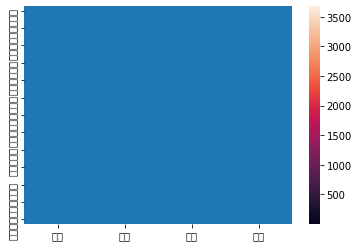

In [55]:
import seaborn as sns
sns.heatmap(gu_df_temp[['강간','강도','절도','폭력']])

In [52]:
# 한글 데이터 시각화를 위한 준비
%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="SpoqaHanSansBold.ttf").get_name()
rc('font', family=font_name)

In [53]:
font_name

'SpoqaHanSans'